# **STINTSY Machine Project**

## *Group # - S16*
- **Ang, Danielle Faith** 
- **De Los Santos, Hanna Angela**
- **Robles, Luis Miguel**
- **Sarreal, Sophia Althea**

# **Import Libraries**

In [765]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import skew

# **Dataset Description**

The file contains data about expenditures and other disbursements, housing characteristics, social protection, Income and other receipts and Entrepreneural Activities.

# **Structure of the Dataset**

# **Reading the Dataset**

In [766]:
fies_df = pd.read_csv('FIES PUF 2012 Vol.1.CSV')

# **Cleaning the Dataset**

In [767]:
display(fies_df.head())

,W_REGN,W_OID,W_SHSN,W_HCN,URB,RSTR,PSU,BWEIGHT,RFACT,FSIZE,...,PC_QTY,OVEN_QTY,MOTOR_BANCA_QTY,MOTORCYCLE_QTY,POP_ADJ,PCINC,NATPC,NATDC,REGDC,REGPC
0,14,101001000,2,25,2,21100,415052,138.25,200.6576,3.0,...,01,01,,,0.946172,108417.00,9,8,8,9
1,14,101001000,3,43,2,21100,415052,138.25,200.6576,12.5,...,,01,,01,0.946172,30631.60,5,9,9,4
2,14,101001000,4,62,2,21100,415052,138.25,200.6576,2.0,...,,01,,,0.946172,86992.50,9,6,6,8
3,14,101001000,5,79,2,21100,415052,138.25,200.6576,4.0,...,,01,,,0.946172,43325.75,6,6,6,6
4,14,101001000,10,165,2,21100,415052,138.25,200.6576,5.0,...,,,,01,0.946172,37481.80,6,6,6,5


In [768]:
selected_df = fies_df[["TOINC", "AGE", "SEX", "HGC", "JOB", "FSIZE"]].copy()

In [769]:
selected_df

,TOINC,AGE,SEX,HGC,JOB,FSIZE
0,325251,75,2,280,2,3.0
1,382895,48,1,250,1,12.5
2,173985,55,1,552,2,2.0
3,173303,44,1,830,1,4.0
4,187409,42,1,350,1,5.0
...,...,...,...,...,...,...
40166,150508,28,2,350,1,5.0
40167,129320,48,1,350,1,9.0
40168,114824,66,1,230,1,6.0
40169,154925,42,1,280,1,5.0


In [770]:
selected_df[["TOINC", "AGE", "SEX", "HGC", "JOB", "FSIZE"]].isnull().sum()

TOINC    0
AGE      0
SEX      0
HGC      0
JOB      0
FSIZE    0
dtype: int64

### **`HGC`** - ***(Household Head) Highest Grade Completed***

The **HGC** variable represents the highest level of education completed by the household head.

### **Education Levels and Codes:**

- **No Grade Completed:** `0`  
- **Preschool:** `10`  
- **Elementary Undergraduate:** `210-260`  
- **Elementary Graduate:** `280`  
- **High School Undergraduate:** `310-330`  
- **High School Graduate:** `350`  
- **Post-Secondary Undergraduate:** `410-420`  
- **Post-Secondary Graduate (Technical/Vocational):** `501-589`  
- **College Undergraduate:** `810-840`  
- **College Graduate:** `601-689`  
- **Post-Baccalaureate:** `900`  

In [771]:
selected_df["HGC"].unique()

array([280, 250, 552, 830, 350, 634, 554, 320, 514, 240, 581, 810, 614,
       900, 652, 330,   0, 840, 230, 584, 534, 562, 220, 310, 210, 622,
       410, 686, 572, 662, 672, 820, 260, 681, 420, 631, 684, 642, 648,
       601, 646, 676, 586, 589, 658, 689, 501, 621, 548, 632, 654, 638,
       664,  10, 522, 685, 521, 644, 542, 531, 558, 532])

As seen by using **`.unique()`**, these codes are not continuous single values, but instead appear in ranges for certain education levels.

With this, we mapped these numerical codes into standardized categories based on the dictionary.

<small>***Note that the dictionary lists College Undergraduate as ranging from **810-840** and College Graduate as **601-689**, so their values in the mapping may seem reversed.* </small>

In [772]:
print(selected_df["HGC"].between(601, 689).sum())  # Expected graduates
print(selected_df["HGC"].between(810, 840).sum())  # Expected undergraduates


4210
3237


In [773]:
conditions = [
    (selected_df["HGC"] == 0), 
    (selected_df["HGC"] == 10),
    (selected_df["HGC"].between(210, 260)), 
    (selected_df["HGC"] == 280), 
    (selected_df["HGC"].between(310, 330)),  
    (selected_df["HGC"] == 350), 
    (selected_df["HGC"].between(410, 420)), 
    (selected_df["HGC"].between(501, 589)),  
    (selected_df["HGC"].between(810, 840)), 
    (selected_df["HGC"].between(601, 689)), 
    (selected_df["HGC"] >= 900)  
]

values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  

selected_df["HGC"] = np.select(conditions, values, default=np.nan) 

selected_df

,TOINC,AGE,SEX,HGC,JOB,FSIZE
0,325251,75,2,3.0,2,3.0
1,382895,48,1,2.0,1,12.5
2,173985,55,1,7.0,2,2.0
3,173303,44,1,8.0,1,4.0
4,187409,42,1,5.0,1,5.0
...,...,...,...,...,...,...
40166,150508,28,2,5.0,1,5.0
40167,129320,48,1,5.0,1,9.0
40168,114824,66,1,2.0,1,6.0
40169,154925,42,1,3.0,1,5.0


After mapping, we check if there are values not accounted for and if there are null values.

In [774]:
selected_df[["HGC"]].isnull().sum()

HGC    0
dtype: int64

Now, we deal with the outliers. We will use a boxplot to visualize the distribution.

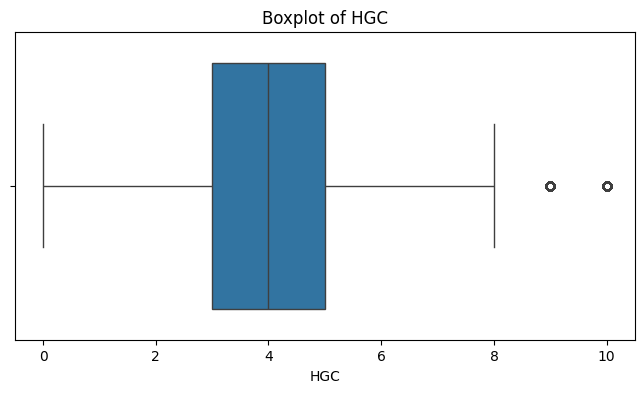

In [775]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=selected_df["HGC"])
plt.title("Boxplot of HGC")
plt.show()

The boxplot shows that values **9** and **10** are outliers but college graduates and post-baccalaureate graduates are valid, so we will keep these.

### **`AGE`** - ***Age***

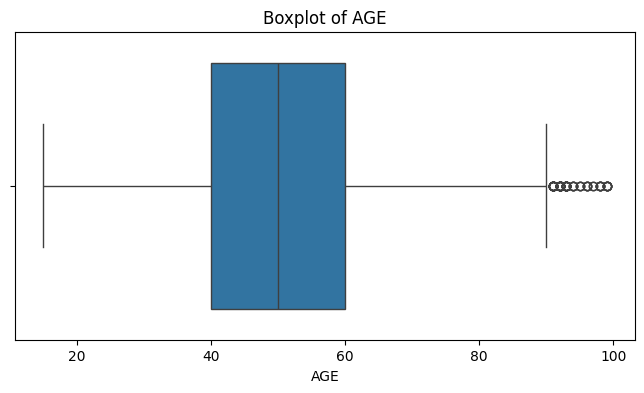

In [776]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=selected_df["AGE"])
plt.title("Boxplot of AGE")
plt.show()

In [777]:
selected_df = selected_df[(selected_df["AGE"] >= 18) & (selected_df["AGE"] <= 90)]

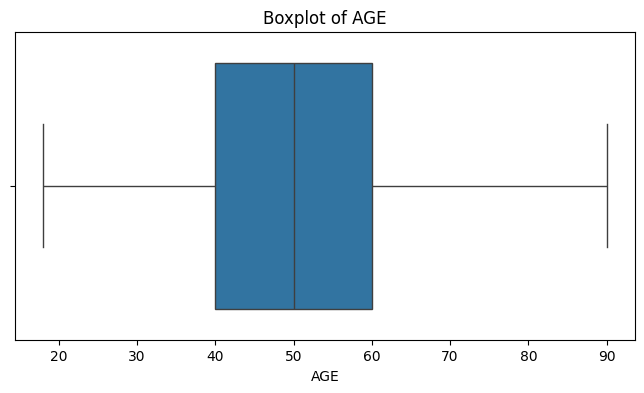

In [778]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=selected_df["AGE"])
plt.title("Boxplot of AGE")
plt.show()

### **`SEX`** - ***Sex***

Male -> 0
Female -> 1 will fix desc later

In [779]:
selected_df["SEX"].value_counts()

SEX
1    31522
2     8541
Name: count, dtype: int64

In [780]:
selected_df = selected_df.copy()
selected_df['SEX'] = selected_df['SEX'].replace({1: 0, 2: 1})  


### **`TOINC`** - ***Total Income***

In [781]:
selected_df[selected_df["TOINC"] < 0]

,TOINC,AGE,SEX,HGC,JOB,FSIZE


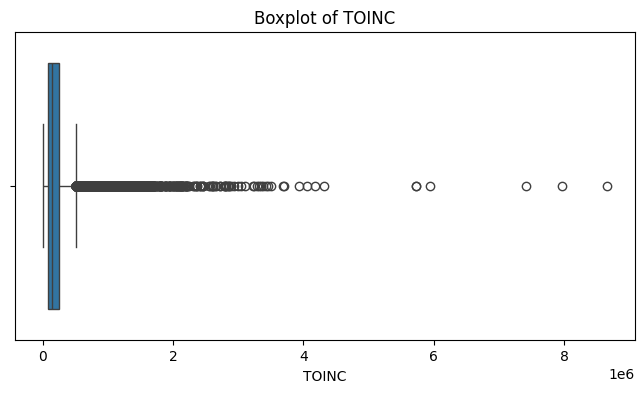

In [782]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=selected_df["TOINC"])
plt.title("Boxplot of TOINC")
plt.show()

In [783]:
selected_df = selected_df.copy()
selected_df["TOINC"] = np.log1p(selected_df["TOINC"])


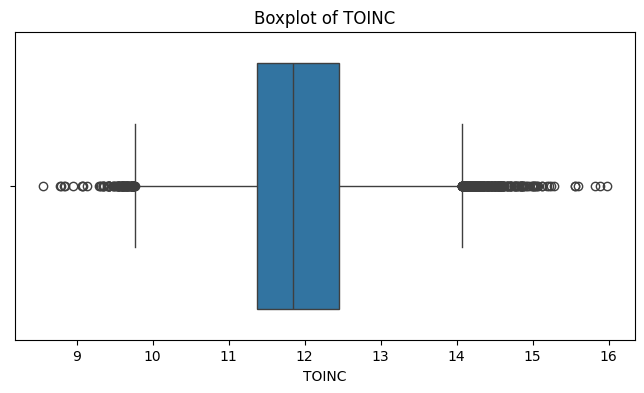

In [784]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=selected_df["TOINC"])
plt.title("Boxplot of TOINC")
plt.show()

### **`FSIZE`** - ***Family Size***

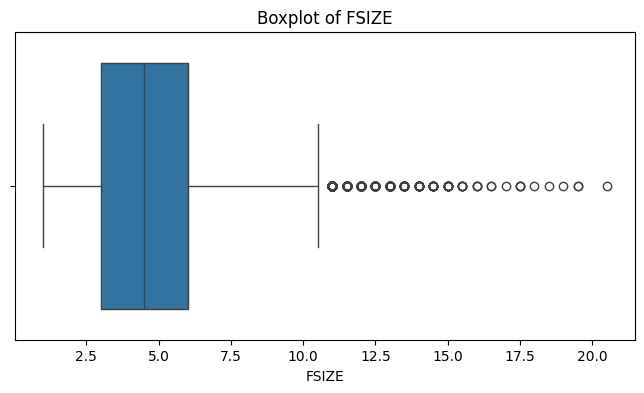

In [785]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=selected_df["FSIZE"])
plt.title("Boxplot of FSIZE")
plt.show()

In [786]:
print("Skewness of FSIZE:", selected_df['FSIZE'].skew())

Skewness of FSIZE: 0.7440855721696026


In [787]:
selected_df = selected_df.copy()
selected_df['FSIZE'] = np.log1p(selected_df['FSIZE'])

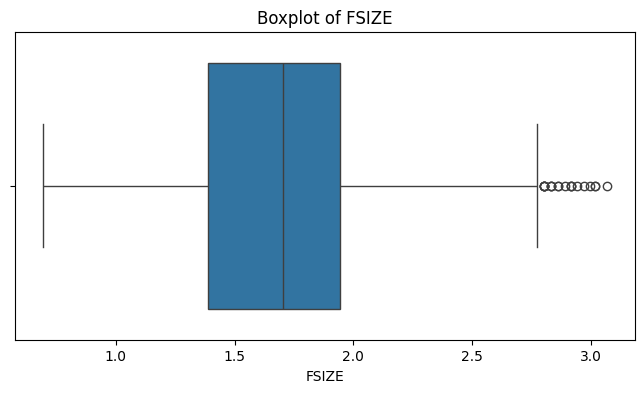

In [788]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=selected_df["FSIZE"])
plt.title("Boxplot of FSIZE")
plt.show()

In [789]:
print("Skewness of FSIZE:", selected_df['FSIZE'].skew())

Skewness of FSIZE: -0.41714273903963184


### **`JOB`** - ***Job/Business Indicator***

0 -> no business/job 1 -> has business/job will fix desc later

In [790]:
selected_df['JOB'] = selected_df['JOB'].map({1: 1, 2: 0}) 

# **Exploratory Data Analysis**

In [791]:
selected_df = selected_df.copy()
scaler = StandardScaler()
selected_df[['AGE', 'FSIZE', 'TOINC']] = scaler.fit_transform(selected_df[['AGE', 'FSIZE', 'TOINC']])

array([[<Axes: title={'center': 'TOINC'}>,
        <Axes: title={'center': 'AGE'}>],
       [<Axes: title={'center': 'SEX'}>, <Axes: title={'center': 'HGC'}>],
       [<Axes: title={'center': 'JOB'}>,
        <Axes: title={'center': 'FSIZE'}>]], dtype=object)

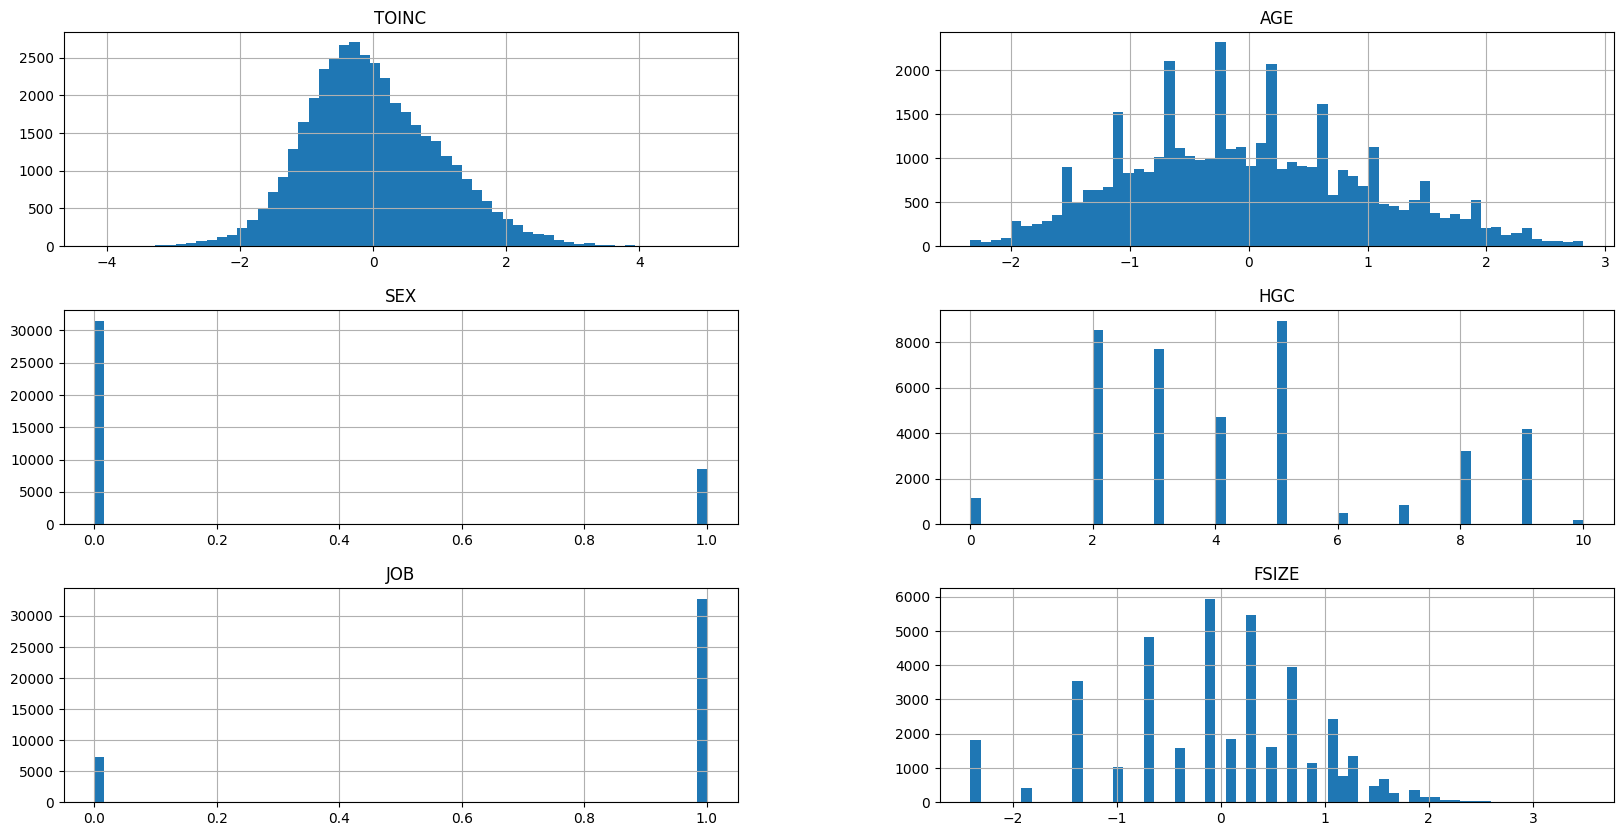

In [792]:
selected_df.hist(bins=60, figsize=(20,10))

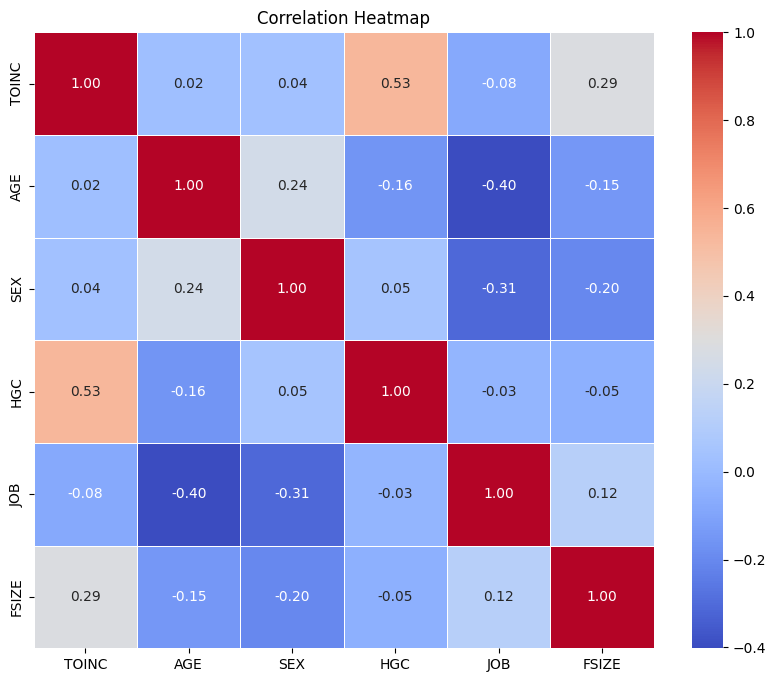

In [793]:
plt.figure(figsize=(10, 8))
sns.heatmap(selected_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# **Splitting the Dataset**

In [794]:
X = selected_df.drop(columns=["TOINC"])
y = selected_df["TOINC"]

In [795]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11, test_size=0.2)